# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

- (Series/DataFrame).plot(kind="종류")   #kind:default lineplot
- (Series/DataFrame).plot.그래프함수()

C:\Users\user\AppData\Local\Temp\ipykernel_25904\697193836.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  converters={'date':np.str})


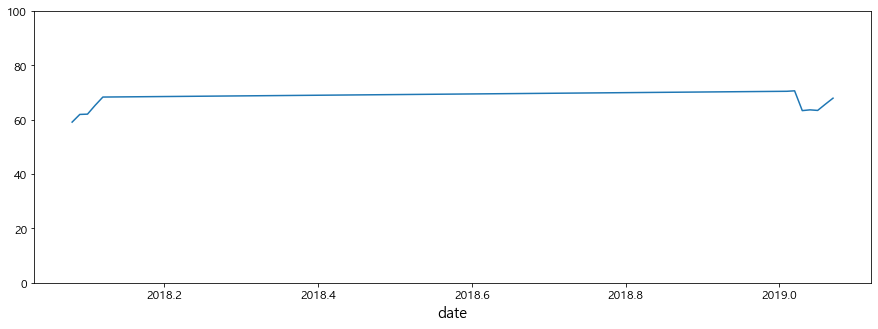

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('data/webbrowser_share.xls', 
                   index_col=0, 
                   converters={'date':np.str})

# index: 연.월, value: 점유율값
plt.figure(figsize=(15,5))
df['Chrome'].plot()
plt.ylim(0,100)
plt.show()

- pd.date_range() 
    - 일정 간격으로 증/감하는 특정 범위의 날짜를 가지는 index(DatetimeIndex)를 생성
        - 시계열 데이터의 행index를 날짜시간로 만들때 사용.

#### (시작날짜, 끝날짜)

In [4]:
pd.date_range('2022-06-01', '2022-06-10')

DatetimeIndex(['2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04',
               '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08',
               '2022-06-09', '2022-06-10'],
              dtype='datetime64[ns]', freq='D')

#### (시작날짜, freq='증감간격기준',period=개수)
- freq: YS-년도, MS - 월, DS(기본) - 날짜  (해당 기준의 마지막일시) 
- freq 문자열 앞에 숫자를 붙이면 그 숫자의 기간만큼 증감

In [5]:
pd.date_range('2022-01-01', freq='MS', periods=5)

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [6]:
pd.date_range('2022-01-01', freq='3YS', periods=5)

DatetimeIndex(['2022-01-01', '2025-01-01', '2028-01-01', '2031-01-01',
               '2034-01-01'],
              dtype='datetime64[ns]', freq='3AS-JAN')

In [7]:
# 평균: 5, 표준편차: 3 인 정규분포를 따르는 난수 생성
# size: (10,3) shape
# index명이 연속된 일시(DatetimeIndex)의 DataFrame => 시계열 데이터. (일시 변화에 따른 어떤 값의 변화를 가지는 데이터셋)
value = np.random.normal(5,3, size=(10,3))
print(value.shape)
index = pd.date_range('2022-06-01', freq='D', periods=10)
# index
df = pd.DataFrame(value, index=index, columns=['no1', 'no2', 'no3'])
df

(10, 3)


,no1,no2,no3
2022-06-01,6.177069,6.056386,2.677331
2022-06-02,9.608556,5.624735,5.372193
2022-06-03,0.849792,5.452361,6.265719
2022-06-04,4.359739,1.501464,9.293858
2022-06-05,9.864723,0.870736,6.385276
2022-06-06,5.699405,5.862421,12.340374
2022-06-07,-0.208170,1.064750,9.867555
2022-06-08,9.252352,3.740247,8.323690
2022-06-09,5.515212,-0.424255,1.208751
2022-06-10,5.378177,2.734553,3.952251


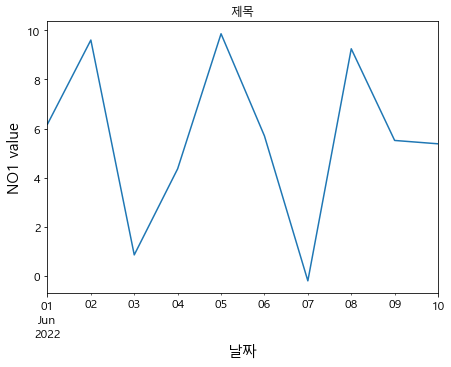

In [9]:
# series/dataframe.plot() : 선그래프
# X: index명, y: 값
df['no1'].plot(figsize=(7,5), title='제목', ylabel='NO1 value', xlabel='날짜')  
plt.show()

matplotlib를 이용해 여러 설정들 가능

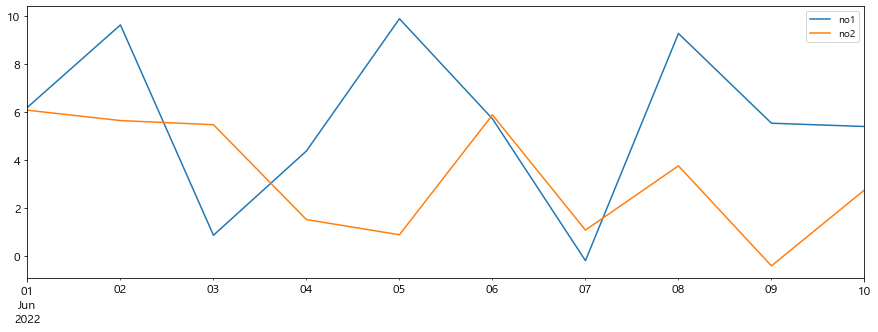

In [10]:
# 여러개 컬럼의 값들을 하나의  axes에 그리기.
# dataframe.plot메소드()
df[['no1', 'no2']].plot(figsize=(15,5))
plt.show()

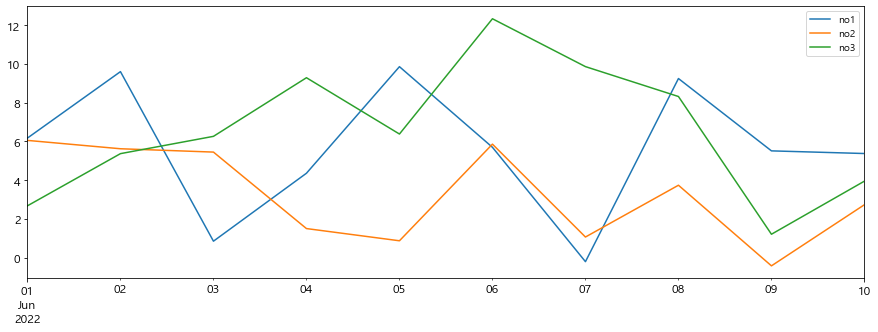

In [11]:
df.plot(figsize=(15,5))
plt.show()

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.
    - index: 수량을 세려는 대상
    - value: 수량

#### 수직

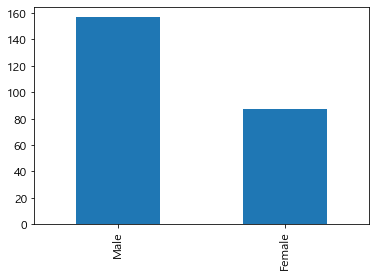

In [14]:
tips = pd.read_csv('data/tips.csv')

tips['sex'].value_counts().plot(kind='bar')
plt.show()

#### 수평

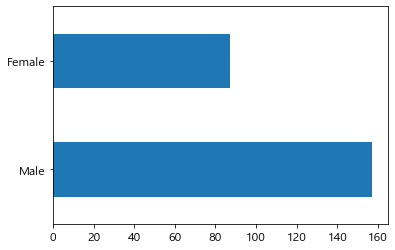

In [15]:
tips = pd.read_csv('data/tips.csv')

tips['sex'].value_counts().plot(kind='barh')
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


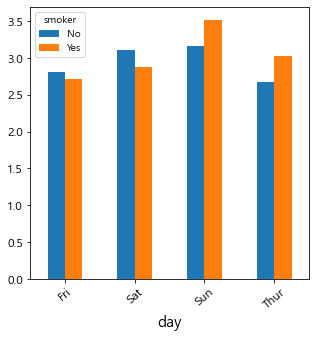

In [18]:
# 요일별, 흡연여부의 팁의 평균
tips.pivot_table(index='day', columns='smoker', values='tip', aggfunc='mean').plot(kind='bar',figsize=(5,5), rot=40) #40도
plt.show()

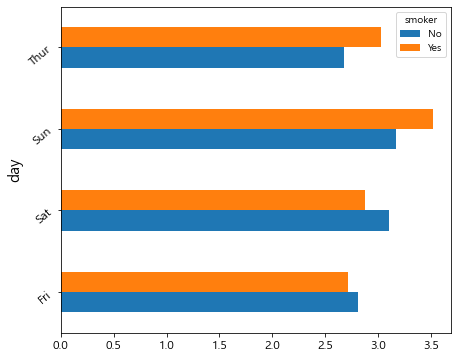

In [19]:
# index: 수량을 셀 goupby 컬럼, columns: 막대그래프를 나눠서 볼 groupby 컬럼
tips.pivot_table(index='day', columns='smoker', values='tip', aggfunc='mean').plot(kind='barh',figsize=(7,6), rot=40) #40도
plt.show()

## 파이차트

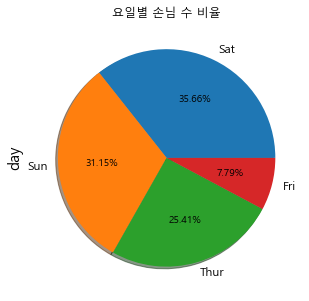

In [21]:
tips['day'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f%%', shadow=True, title='요일별 손님 수 비율')
plt.show()

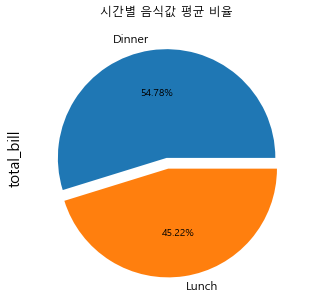

In [22]:
tips.groupby('time')['total_bill'].mean().plot(kind='pie', figsize=(5,5), autopct='%.2f%%', explode=[0,0.1])
plt.title('시간별 음식값 평균 비율')
plt.show()

## 히스토그램, KDE(밀도그래프)
- kde : 히스토그램을 부드러운 곡선형태로 그린 그래프.(커널밀도함수 이용해서 계산한 결과를 그래프로 그린것)

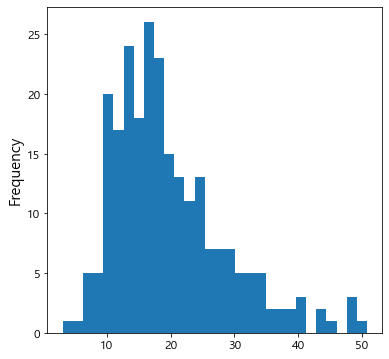

In [26]:
tips['total_bill'].plot(kind='hist', bins=30, figsize=(6,6))
plt.show()

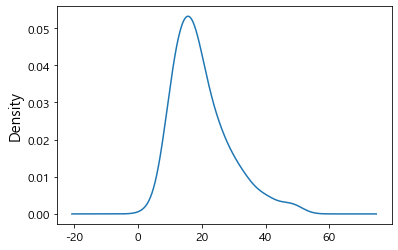

In [25]:
tips['total_bill'].plot(kind='kde', figsize=(6,4))
plt.show()

## Boxplot (상자그래프)

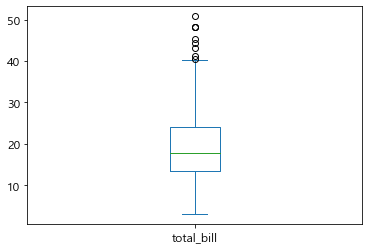

In [27]:
tips['total_bill'].plot(kind='box', whis=1.5)
plt.show()

극단치 : 정상범위를 넘어선 값들. 이상치(Outlier-극단치, 오류값) 중에 하나
- boxplot에서 극단치를 계산하는 방법.
1. IQR(Inter Quantile Range) 계산
    - 3분위값 - 1분위값 (중간 50%- 25% ~ 75% 의 크기)
2. 정상범위 이하의 극단치(극단적으로 작은값):  1분위값 - IQR * 1.5   보다 작은 값들
3. 정상범위 이상의 극단치(극단적으로 큰값):   3분위값 + IQR * 1.5    보다 큰 값들

- 1.5: 조절할 수 있는 값 => whis값   
- 정상범위를 늘리고 싶을 경우 1.5 보다 큰값을 곱하면 된다.
- 정상범위를 줄이고 싶을 경우 1.5 보다 작은값을 곱하면 된다.

In [28]:
quantile = tips['total_bill'].quantile(q=[0.25, 0.5, 0.75])
IQR = quantile[0.75] - quantile[0.25]
print("IQR:", IQR)
whis = 1.5
o1 = quantile[0.25] - IQR * whis
o3 = quantile[0.75] + IQR * whis
print(f"정상범위: {o1} ~ {o3}")
tips['total_bill'][(tips['total_bill'] < o1) | (tips['total_bill'] > o3)]

IQR: 10.779999999999998
정상범위: -2.8224999999999945 ~ 40.29749999999999


59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

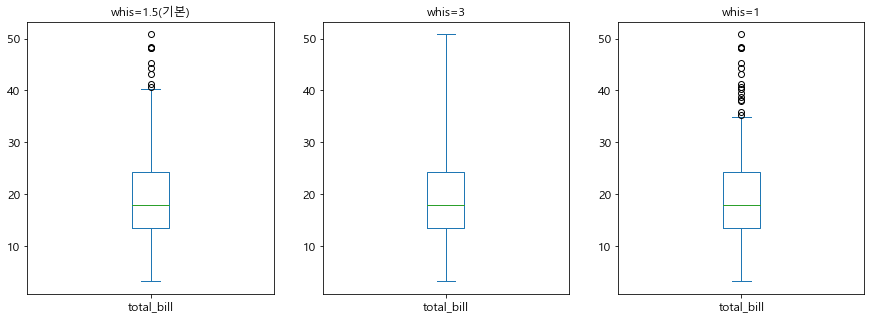

In [29]:
# whis 변화에 따른 이상치 변화
# 하나의 figure에 여러개의 axes를 사용하는 경우.
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

tips['total_bill'].plot(kind='box', title='whis=1.5(기본)', ax=ax1)  #ax1에 그려라.
tips['total_bill'].plot.box(whis=3, title='whis=3', ax=ax2)  #1.5 -> 3 (늘림) : 정상범위가 넓어진다.
tips['total_bill'].plot(kind='box', whis=1, title='whis=1', ax=ax3) # 1.5 -> 1(줄임): 정상범위가 좁아진다.
# tips['day'].value_counts().plot(kind='bar', ax=ax3)
plt.show()

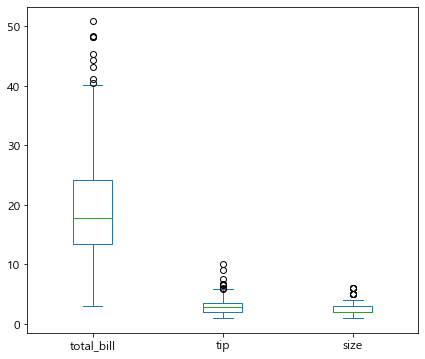

In [30]:
# DataFrame.plot(kind='box')  # 한 Axes에 컬럼별로 boxplot을 그린다.
tips[['total_bill', 'tip', 'size']].plot(kind='box', figsize=(7,6))
plt.show()

## scatter plot (산점도) 

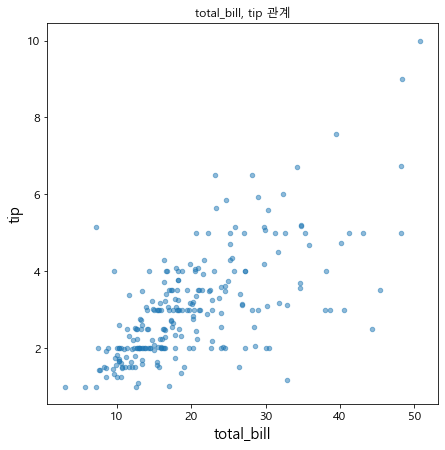

In [32]:
tips.plot(kind='scatter', x='total_bill', y='tip', figsize=(7,7), alpha=0.5)  #x의 컬럼명, y의 컬럼명
plt.title('total_bill, tip 관계')
plt.show()